In [1]:
#Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
#Read the dataset:
data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
#Organize our data:
#If status = 1 , then dead = 0
#If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [4]:
#Create two objects for groups:
#kmf_m for male data:
#kmf_f for female data:
kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

In [5]:
#Dividing data into groups:
Male = data.query("sex == 1")
Female = data.query("sex == 2")

In [6]:
#View data of Male group:
Male.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [7]:
#View data of Female group:
Female.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
6,7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0
11,12,16.0,654,2,68,2,2.0,70.0,70.0,NaN,23.0,1.0
12,13,11.0,728,2,68,2,1.0,90.0,90.0,NaN,5.0,1.0
18,19,1.0,61,2,56,2,2.0,60.0,60.0,238.0,10.0,1.0


In [8]:
#Fit data into objects:
kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [9]:
#Event table for male group:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [10]:
#Event table for female group:
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [11]:
#Predict value based on time:
kmf_m.predict(11)

0.9782608695652172

In [12]:
#Predict value based on time:
kmf_f.predict(11)

0.9888888888888887

In [13]:
#Get complete data of survival function for male group:
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


In [14]:
#Get complete data of survival function for female group:
kmf_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


Text(0.5, 1.0, 'KMF')

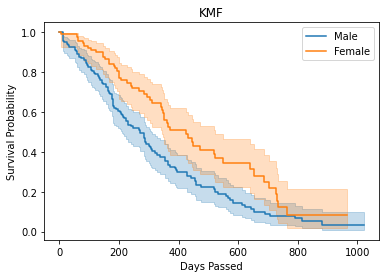

In [15]:
#Plot the survival_function data:
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.title("KMF")

In [16]:
#Cumulative density for male group:
kmf_m.cumulative_density_

,Male
timeline,
0.0,0.000000
11.0,0.021739
12.0,0.028986
13.0,0.043478
15.0,0.050725
...,...
814.0,0.946429
840.0,0.946429
883.0,0.964286


In [17]:
#Cumulative density for female group:
kmf_f.cumulative_density_

,Female
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022222
61.0,0.033333
62.0,0.044444
...,...
735.0,0.875178
740.0,0.875178
765.0,0.916786


Text(0, 0.5, 'Probability')

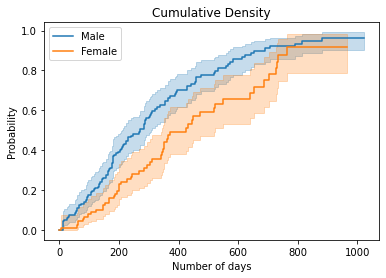

In [18]:
#PLot the graph for cumulative density for both groups:
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.title("Cumulative Density")
plt.xlabel("Number of days")
plt.ylabel("Probability")

In [19]:
#Hazard Function:
from lifelines import NelsonAalenFitter

In [20]:
#Fitting the data into objects:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()
naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

In [21]:
#Cumulative hazard for male group:
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [22]:
#Cumulative hazard for female group:
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


Text(0, 0.5, 'Cumulative Hazard')

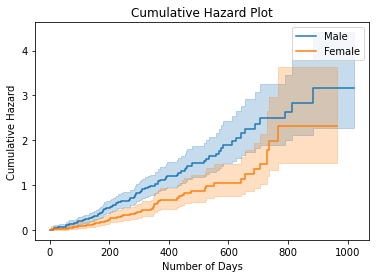

In [23]:
#Plot the graph for cumulative hazard:
naf_m.plot_cumulative_hazard(label="Male")
naf_f.plot_cumulative_hazard(label="Female")
plt.title("Cumulative Hazard Plot")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Hazard")

In [24]:
#Conditional median time to event of interest:
kmf_m.conditional_time_to_event_

,Male - Conditional median duration remaining to event
timeline,
0.0,270.0
11.0,272.0
12.0,271.0
13.0,271.0
15.0,270.0
...,...
814.0,inf
840.0,inf
883.0,inf


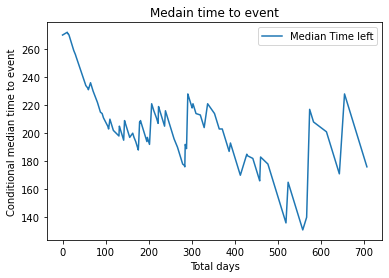

In [25]:
#Conditional median time left for event for male group:
median_time_to_event = kmf_m.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [26]:
#Conditional median time to event of interest for female group:
kmf_f.conditional_time_to_event_

,Female - Conditional median duration remaining to event
timeline,
0.0,426.0
5.0,421.0
60.0,373.0
61.0,372.0
62.0,371.0
...,...
735.0,inf
740.0,inf
765.0,inf


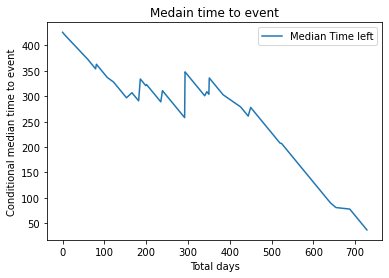

In [27]:
#Conditional median time left for event for female group:
median_time_to_event = kmf_f.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [28]:
#Survival probability with confidence interval for male group:
kmf_m.confidence_interval_survival_function_

,Male_lower_0.95,Male_upper_0.95
0.0,1.000000,1.000000
11.0,0.934122,0.992937
12.0,0.924619,0.989022
13.0,0.905787,0.980229
15.0,0.896549,0.975490
...,...,...
814.0,0.019335,0.114081
840.0,0.019335,0.114081
883.0,0.008603,0.096828
1010.0,0.008603,0.096828


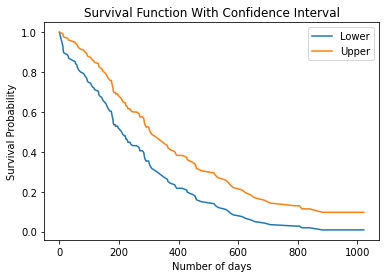

In [29]:
#Plot survival function with confidence interval for male group:
confidence_surv_func = kmf_m.confidence_interval_survival_function_
plt.plot(confidence_surv_func["Male_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Male_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [30]:
#Survival probability with confidence interval for female group:
kmf_f.confidence_interval_survival_function_

,Female_lower_0.95,Female_upper_0.95
0.0,1.000000,1.000000
5.0,0.923743,0.998427
60.0,0.914060,0.994396
61.0,0.900217,0.989126
62.0,0.885909,0.983083
...,...,...
735.0,0.042931,0.252736
740.0,0.042931,0.252736
765.0,0.018505,0.212364
821.0,0.018505,0.212364


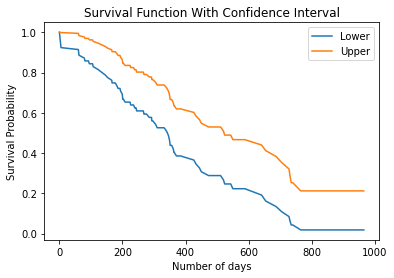

In [31]:
#Plot survival function with confidence interval for female group:
confidence_surv_func = kmf_f.confidence_interval_survival_function_
plt.plot(confidence_surv_func["Female_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Female_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

Text(0.5, 0, 'Number of Days')

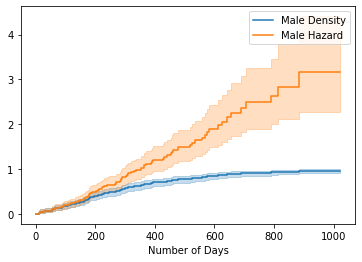

In [32]:
#Plot the cumulative_hazard and cumulative density:
kmf_m.plot_cumulative_density(label="Male Density")
naf_m.plot_cumulative_hazard(label="Male Hazard")
plt.xlabel("Number of Days")

Text(0.5, 0, 'Number of Days')

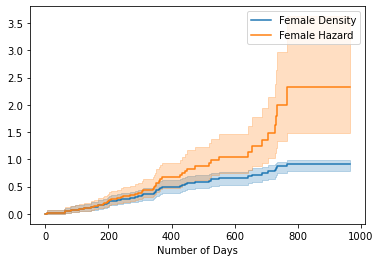

In [33]:
#Plot the cumulative_hazard and cumulative density:
kmf_f.plot_cumulative_density(label="Female Density")
naf_f.plot_cumulative_hazard(label="Female Hazard")
plt.xlabel("Number of Days")

In [34]:
#Define variables for log-rank test:
Time_A = Male['time']
Event_A = Male['dead']

In [35]:
Time_B = Female['time']
Event_B = Female['dead']

In [36]:
#Performing the Log-Rank test:
from lifelines.statistics import logrank_test

In [37]:
results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [38]:
#Print the P-value:
print("P-value :",results.p_value)

P-value : 0.0013111645203554654
